<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/classic_hopfield_network_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import matplotlib.pyplot as plt
import numpy as np
!wget -O hopfieldHeader.py https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/c9ec41464b976c48a4f44e75ae12fe68e6b58abd/hopfieldHeader.py
import hopfieldHeader as hopf
from PIL import Image
import requests
import zipfile
from io import BytesIO

# Send a GET request to download the zip file
response = requests.get("https://github.com/kebabee/ML-assiociative-memory/raw/08eb242de52b29dd9ae769b8bb4af3714a884bab/letters/letters.zip")

# Check if the request was successful
if response.status_code == 200:
    # Read the content of the zip file
    zip_content = BytesIO(response.content)

    # Extract the zip file contents
    with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        # Extract all contents to the 'letters' folder
        zip_ref.extractall('letters')
    print("Letters extraction successful.")
else:
    print("Failed to download the zip file.")

--2024-04-01 20:08:35--  https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/c9ec41464b976c48a4f44e75ae12fe68e6b58abd/hopfieldHeader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16277 (16K) [text/plain]
Saving to: ‘hopfieldHeader.py’

hopfieldHeader.py   100%[===================>]  15.90K  --.-KB/s    in 0.001s  

2024-04-01 20:08:35 (19.8 MB/s) - ‘hopfieldHeader.py’ saved [16277/16277]

Letters extraction successful.


In [49]:
A = np.where(np.array(Image.open('letters/A.png'))[:,:,0]<128,1,-1).reshape(-1)
N = np.where(np.array(Image.open('letters/N.png'))[:,:,0]<128,1,-1).reshape(-1)
O = np.where(np.array(Image.open('letters/O.png'))[:,:,0]<128,1,-1).reshape(-1)
Z = np.where(np.array(Image.open('letters/Z.png'))[:,:,0]<128,1,-1).reshape(-1)

lettersPatterns = [A,N,O,Z]

network = hopf.hopfieldNet(256)
network.learn([A,N,O,Z])
network.setPatterns([A,N,O,Z,-A,-N,-O,-Z])

noisedData = [
  hopf.noise(A, 20),
  hopf.noise(N, 20),
  hopf.noise(O, 20),
  hopf.noise(Z, 20),
  hopf.noise(A, 40),
  hopf.noise(N, 40),
  hopf.noise(O, 40),
  hopf.noise(Z, 40),
  hopf.noise(A, 100),
  hopf.noise(N, 100),
  hopf.noise(O, 100),
  hopf.noise(Z, 100),
  hopf.noise(-A, 20),
  hopf.noise(-N, 20),
  hopf.noise(-O, 20),
  hopf.noise(-Z, 20)
]

## Patterns learned by the network:

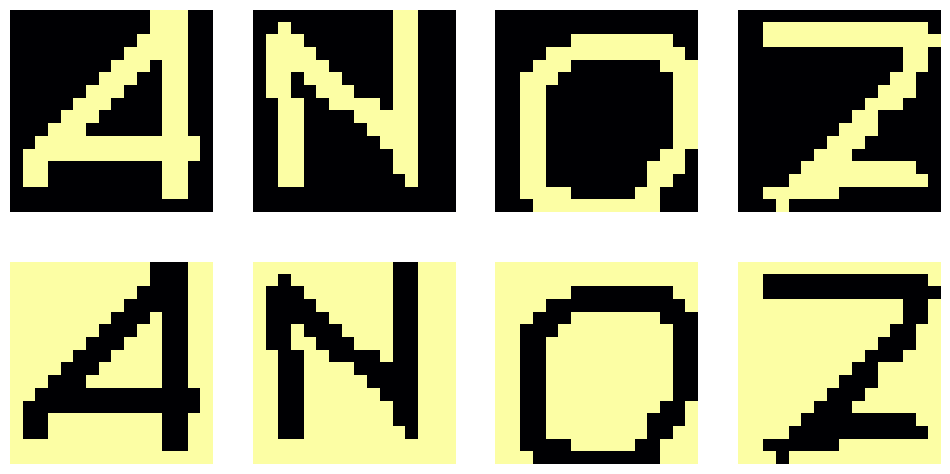

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i in range(len(network.patterns)):
    row, col = i // 4, i % 4  # Oblicz indeksy rzędu i kolumny
    axes[row, col].imshow(network.patterns[i].reshape(16, 16), cmap='inferno')
    axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.show()

## Noised dataset for testing

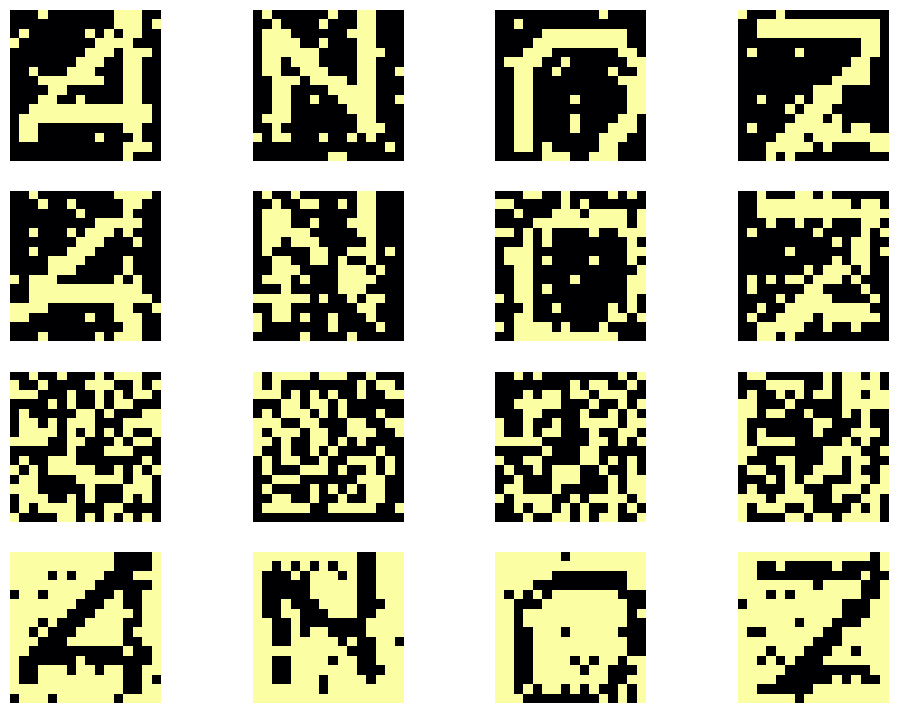

In [51]:
fig, axes = plt.subplots(4, 4, figsize=(12, 9))

for i in range(len(noisedData)):
    row, col = i // 4, i % 4  # Oblicz indeksy rzędu i kolumny
    axes[row, col].imshow(noisedData[i].reshape(16, 16), cmap='inferno')
    axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.show()

## Results:

Iteracja 0, Energia: -35.08765535912474
Iteracja 1, Energia: -35.08765535912474
Zakończono po 1 iteracjach (stabilizacja sieci), błąd: 0
Iteracja 0, Energia: -36.06447633750518
Iteracja 1, Energia: -36.06447633750518
Zakończono po 1 iteracjach (stabilizacja sieci), błąd: 0
Iteracja 0, Energia: -34.10483558154782
Iteracja 1, Energia: -34.10483558154782
Zakończono po 1 iteracjach (stabilizacja sieci), błąd: 0
Iteracja 0, Energia: -33.098701009456164
Iteracja 1, Energia: -33.098701009456164
Zakończono po 1 iteracjach (stabilizacja sieci), błąd: 0
Iteracja 0, Energia: -35.08765535912474
Iteracja 1, Energia: -35.08765535912474
Zakończono po 1 iteracjach (stabilizacja sieci), błąd: 0
Iteracja 0, Energia: -36.06447633750518
Iteracja 1, Energia: -36.06447633750518
Zakończono po 1 iteracjach (stabilizacja sieci), błąd: 0
Iteracja 0, Energia: -34.10483558154782
Iteracja 1, Energia: -34.10483558154782
Zakończono po 1 iteracjach (stabilizacja sieci), błąd: 0
Iteracja 0, Energia: -33.09870100945616

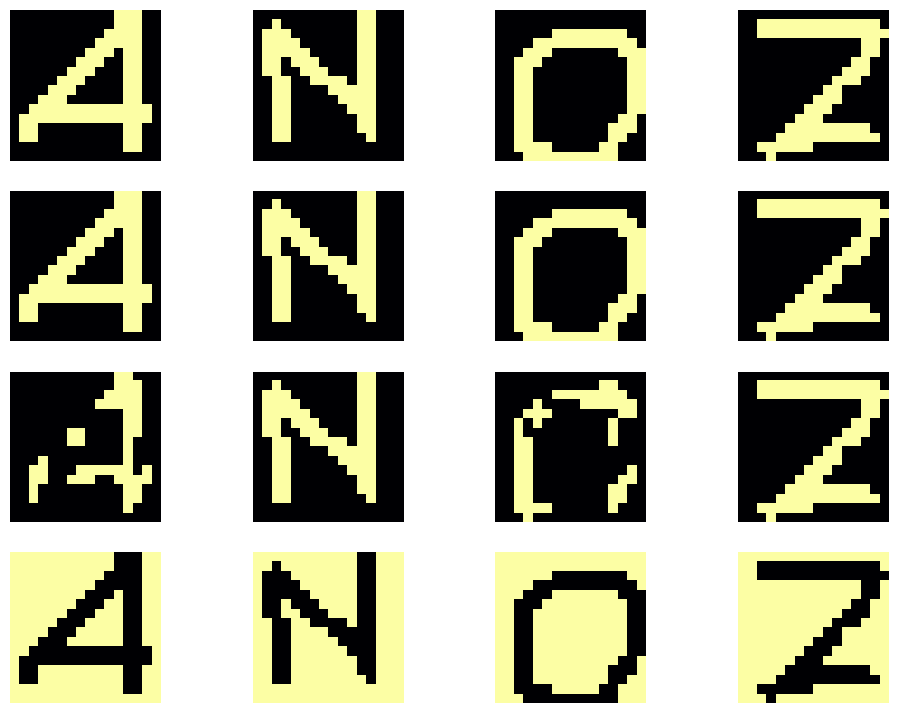

In [52]:
fig, axes = plt.subplots(4, 4, figsize=(12, 9))

for i in range(len(noisedData)):
  result = network.test(noisedData[i])
  row, col = i // 4, i % 4
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.show()

Third row usually gives example of mixed state - network developed local energy minima that do not correspond to any of images in training set.